# Study area

## Goal of the notebook

This notebook aims at defining the domain of study and showing the isobathes of the bathemetry dataset. 

## Data

To download the data see the README.md. The user will need to define the path *datadir* of the folder which holds the data.

## Import modules and open datasets

In [55]:
### IMPORT MODULES ###

import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [57]:
### LOAD BATHYMETRY ###

datadir = '/Users/martina/ex_tesi/datasets/bathymetry/'
ds_bathy = xr.open_dataset(datadir+'MED_GEBCO_30sec.nc')

In *datadir* it is needed to insert the right path to the dataset of the bathymetry

In [58]:
### Define the variables ###

bathy = ds_bathy['elevation'] = ds_bathy['elevation'].where(ds_bathy['elevation']<0, drop=True)
lon = bathy['lon']
lat = bathy['lat']

## Plot of the area of interest: Mediterranean Sea and zoom on the Algerian Basin

/Users/martina/python_envs/paper/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/martina/python_envs/paper/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


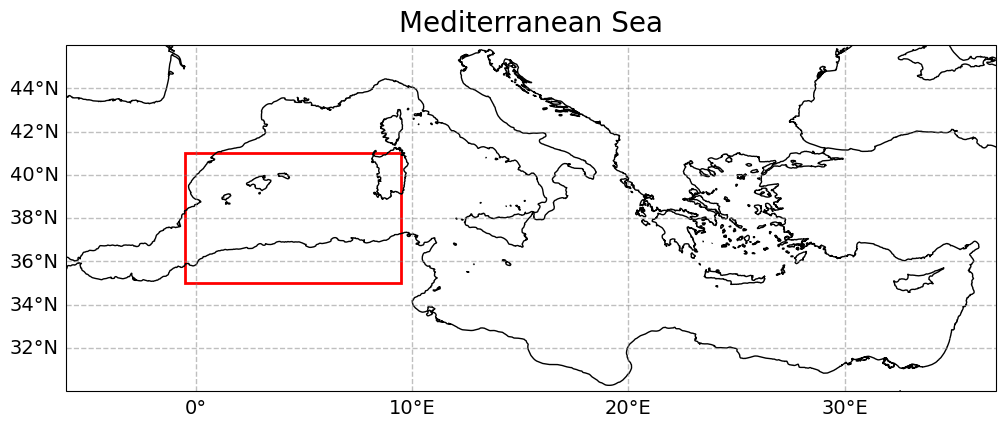

In [ ]:
# Create figure
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 12))

# Add coastlines and grid
ax.coastlines(resolution='10m', color='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
gl.right_labels = False
gl.top_labels = False

# Title
ax.set_title('Mediterranean Sea', fontsize=20, pad=10)

# Map limits
ax.set_extent([-6, 37, 30, 46], crs=ccrs.PlateCarree())

# Draw a box around the Algerian Basin
rect = Rectangle((-0.5, 35), 10, 6, linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rect)

plt.show()

/Users/martina/python_envs/paper/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/martina/python_envs/paper/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


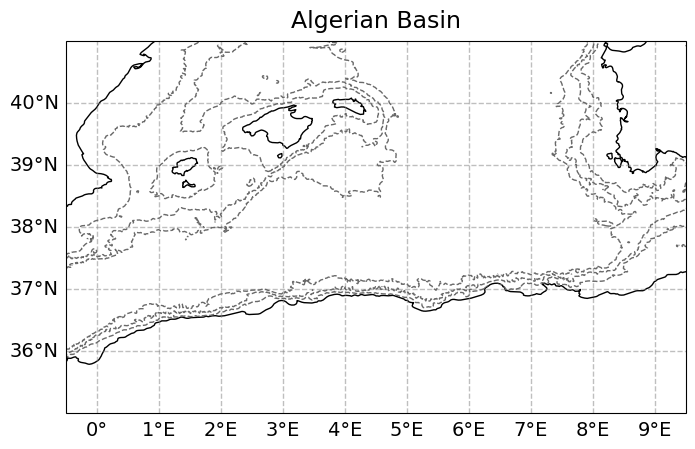

In [ ]:
# Create figure
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 8))

# Add coastlines and grid
ax.coastlines(resolution='10m', color='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = plt.FixedLocator(np.arange(-1, 9.5, 1))
gl.ylocator = plt.FixedLocator(np.arange(35, 42, 1))
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
gl.right_labels = False
gl.top_labels = False

# Add bathymetry
contour = ax.contour(lon, lat, bathy, levels=[ -2500, -1500, -500], colors='dimgray', linewidths=1, transform=ccrs.PlateCarree())

# Title
ax.set_title('Algerian Basin', fontsize=17, pad=10)

# Map limits
ax.set_extent([-0.5, 9.5, 35, 41], crs=ccrs.PlateCarree())

plt.show()